# 8.3 Life Expectancy Case Study Part 3: Model Selection
Name: Joi Chu-Ketterer <br>Date: 10/16/19<br>Course: DSC550 - Data Mining

In [1]:
import pandas as pd #let's me import the data into a dataframe
import numpy as np #allows me to create arrays from the data
import matplotlib.pyplot as plt #allows me to make graphs
from sklearn.preprocessing import LabelEncoder #this let's be encode the categorical data (similar to factor() in R)
from yellowbrick.features import Rank2D #this allows me to graph correlation coefficients among the attributes
from yellowbrick.features import ParallelCoordinates #this allows me to make the parallel coordinates graph
from yellowbrick.style import set_palette #this allows me to customize the palette for the graphs
import seaborn as sns #this allows me to create a heatmap of correlation coefficients 
from sklearn.model_selection import train_test_split #this allows me to split the data into training and testing
from sklearn.linear_model import LinearRegression #this allows me to run a linear regression model

__Step 1.__ Load the data into a Dataframe


In [2]:
data = pd.read_csv("life.csv", dtype='unicode')

__Step 2.__ Display the dimensions of the file


In [3]:
print("Dimensions of Dataframe: ", data.shape)

Dimensions of Dataframe:  (2938, 22)


__Step 3.__ Display the first 5 rows of data so you can see the column headings and the type of data for each column.

The pd.option_context() allows me to see all 22 of the attributes, rather than the truncated version


In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.head(5))

       Country  Year      Status Life Expectancy Adult Mortality  \
0  Afghanistan  2015  Developing              65             263   
1  Afghanistan  2014  Developing            59.9             271   
2  Afghanistan  2013  Developing            59.9             268   
3  Afghanistan  2012  Developing            59.5             272   
4  Afghanistan  2011  Developing            59.2             275   

  Infant Deaths Alcohol Percentage Expenditure Hepatitis B Measles   BMI  \
0            62    0.01            71.27962362          65    1154  19.1   
1            64    0.01            73.52358168          62     492  18.6   
2            66    0.01            73.21924272          64     430  18.1   
3            69    0.01             78.1842153          67    2787  17.6   
4            71    0.01            7.097108703          68    3013  17.2   

  Under-Five Deaths Polio Total Expenditure Diphtheria HIV/AIDS         GDP  \
0                83     6              8.16         65 

__Step 4 and 5.__ 

__a.__ Think about some questions that might help you predict life expectancy:
- What do the variables look like? 
- If they are numerical, what are their distribution; if they are categorical, how many are they in different categories?

In [5]:
print(data.dtypes)

Country                            object
Year                               object
Status                             object
Life Expectancy                    object
Adult Mortality                    object
Infant Deaths                      object
Alcohol                            object
Percentage Expenditure             object
Hepatitis B                        object
Measles                            object
BMI                                object
Under-Five Deaths                  object
Polio                              object
Total Expenditure                  object
Diphtheria                         object
HIV/AIDS                           object
GDP                                object
Population                         object
 thinness  1-19 years              object
 thinness 5-9 years                object
Income Composition of Resources    object
Schooling                          object
dtype: object


From above, it is evident all the variables are objects. However, a lot of them are numbers. In order to use them in predictive analytics later one, they should be changed into floats. 

In [3]:
data['Life Expectancy'] = data['Life Expectancy'].astype(float)
data['Adult Mortality'] = data['Adult Mortality'].astype(float)
data['Infant Deaths'] = data['Infant Deaths'].astype(float)
data['Under-Five Deaths'] = data['Under-Five Deaths'].astype(float)
data['Alcohol'] = data['Alcohol'].astype(float)
data['Percentage Expenditure'] = data['Percentage Expenditure'].astype(float)
data['Hepatitis B'] = data['Hepatitis B'].astype(float)
data['Measles'] = data['Measles'].astype(float)
data['BMI'] = data['BMI'].astype(float)
data['Polio'] = data['Polio'].astype(float)
data['Total Expenditure'] = data['Total Expenditure'].astype(float)
data['Diphtheria'] = data['Diphtheria'].astype(float)
data['HIV/AIDS'] = data['HIV/AIDS'].astype(float)
data['GDP'] = data['GDP'].astype(float)
data['Population'] = data['Population'].astype(float)
data[' thinness  1-19 years'] = data[' thinness  1-19 years'].astype(float)
data[' thinness 5-9 years'] = data[' thinness 5-9 years'].astype(float)
data['Income Composition of Resources'] = data['Income Composition of Resources'].astype(float)
data['Schooling'] = data['Schooling'].astype(float)

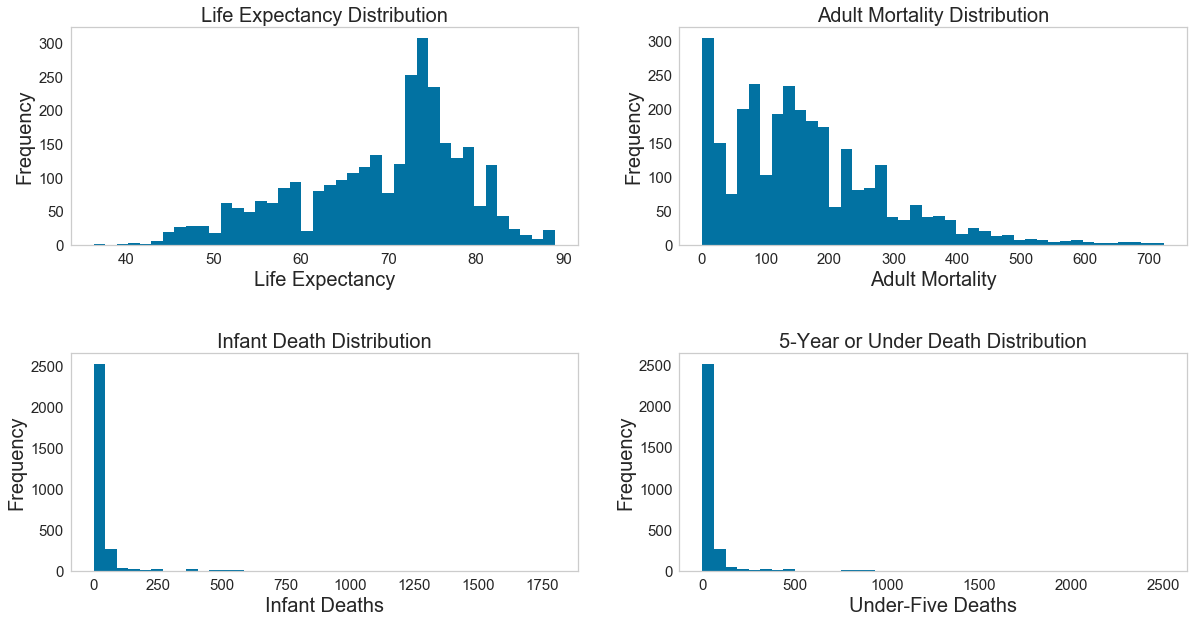

In [7]:
# This determines the plot sizes 
plt.rcParams['figure.figsize'] = (20, 10)

# This specifies how supplot layout
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# This specifies which variables to include across all our subplots 
num_features = ['Life Expectancy', 'Adult Mortality', 'Infant Deaths', 'Under-Five Deaths']
plot_data = num_features
xlab = ['Life Expectancy', 'Adult Mortality', 'Infant Deaths', 'Under-Five Deaths']
ylab = ['Frequency', 'Frequency', 'Frequency', 'Frequency']
titles = ['Life Expectancy Distribution', 'Adult Mortality Distribution', 'Infant Death Distribution', '5-Year or Under Death Distribution']

# This creates an array for the axes, and allows for plot label specification
axes = axes.ravel()

# This for loop, it takes two parameters and cycles through them. For instance, the first plot will draw information
# from the first entry of the num_features, xlab, ylab, and titles lists created above. The second plot with draw
# from the second entry of the same lists and so on. 
for idx, ax in enumerate(axes):
    ax.hist(data[plot_data[idx]].dropna(), bins=40)
    ax.set_xlabel(xlab[idx], fontsize=20)
    ax.set_ylabel(ylab[idx], fontsize=20)
    ax.set_title(titles[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    ax.grid(False) #this removes the grid lines on the plots

    
# This adjusts the spacing between the plots so they don't overlap one another
fig.subplots_adjust(hspace=.5)

plt.show()

The histograms show that for the most part, Life Expectancy is normally distributed, while Adult Mortality, Infant Death, and Under-Five Death are heavily right-skewed. To understand the categorical data, describe() can be used but must have include=['O']. This ensures categorical data is included in the summary, and changes the metrics slightly. Statistical summaries are no longer applicable since attributes like Name can't have a mean value. Instead, total count, unique number of entries, most common attributes, and their frequency are displayed. 

In [8]:
data.describe(include=['O'])

,Country,Year,Status
count,2938,2938,2938
unique,193,16,2
top,Australia,2013,Developing
freq,16,193,2426


In [9]:
print('Total Null Entries')
data.isnull().sum()

Total Null Entries


Country                              0
Year                                 0
Status                               0
Life Expectancy                     10
Adult Mortality                     10
Infant Deaths                        0
Alcohol                            194
Percentage Expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-Five Deaths                    0
Polio                               19
Total Expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income Composition of Resources    167
Schooling                          163
dtype: int64

isnull().sum() can be used to determine how many attributes having missing data. The above table indicates Life Expectancy and Infant Deaths each have 10 missing entries. Alcohol has 194, Hepatitis B has 553, BMI has 34, Polio has 19, Total Expenditure has 226, Diptheria has 19, GDP has 448, Population has 652, Thinness 1-19 Years and Thinness 5-9 years has 34, Income Composition of Resources has 167 and Schooling has 163. 

__b.__ Are the numerical variables correlated? This question will be addressed by plotting scatterplots of various attributes against one another. 

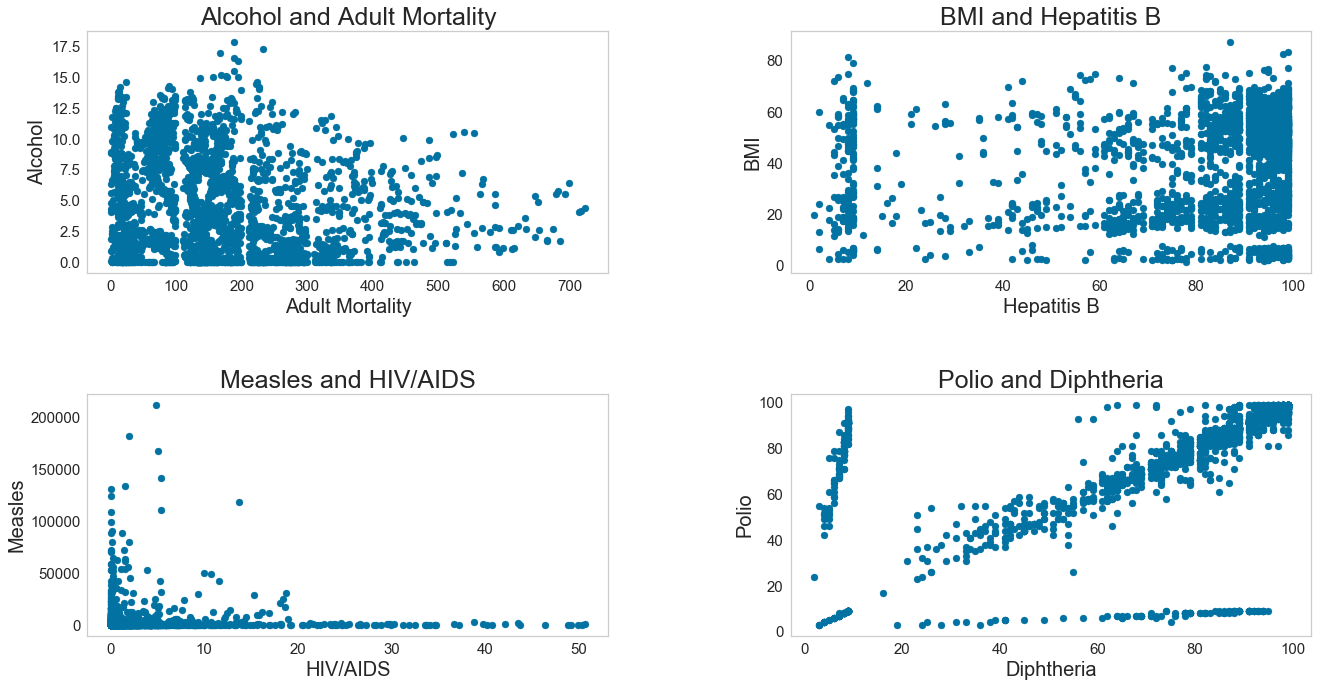

In [10]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# This specifies what data to include in the box plot where values of 1 are catgorized as 'yes' and those of 0 are 'no'
# make the data read to feed into the visulizer
axes[0, 0].scatter(data['Adult Mortality'], data['Alcohol'])
axes[0, 0].set_title('Alcohol and Adult Mortality', fontsize=25)
axes[0, 0].set_ylabel('Alcohol', fontsize=20)
axes[0, 0].set_xlabel('Adult Mortality', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].grid(False)

axes[0, 1].scatter(data['Hepatitis B'], data['BMI'])
axes[0, 1].set_title('BMI and Hepatitis B', fontsize=25)
axes[0, 1].set_ylabel('BMI', fontsize=20)
axes[0, 1].set_xlabel('Hepatitis B', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].grid(False)

axes[1, 0].scatter(data['HIV/AIDS'], data['Measles'])
axes[1, 0].set_title('Measles and HIV/AIDS', fontsize=25)
axes[1, 0].set_ylabel('Measles', fontsize=20)
axes[1, 0].set_xlabel('HIV/AIDS', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].grid(False)

axes[1, 1].scatter(data['Diphtheria'], data['Polio'])
axes[1, 1].set_title('Polio and Diphtheria', fontsize=25)
axes[1, 1].set_ylabel('Polio', fontsize=20)
axes[1, 1].set_xlabel('Diphtheria', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].grid(False)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.35)
plt.show()

The scatterplots show a strong positive relationship between Diptheria and Polio, while the other relationships don't seem to be well correlated. 

__c.__  To explore the difference of age among those who have died, bar plots will be created for Adult Mortality and Infant Deaths per year. 

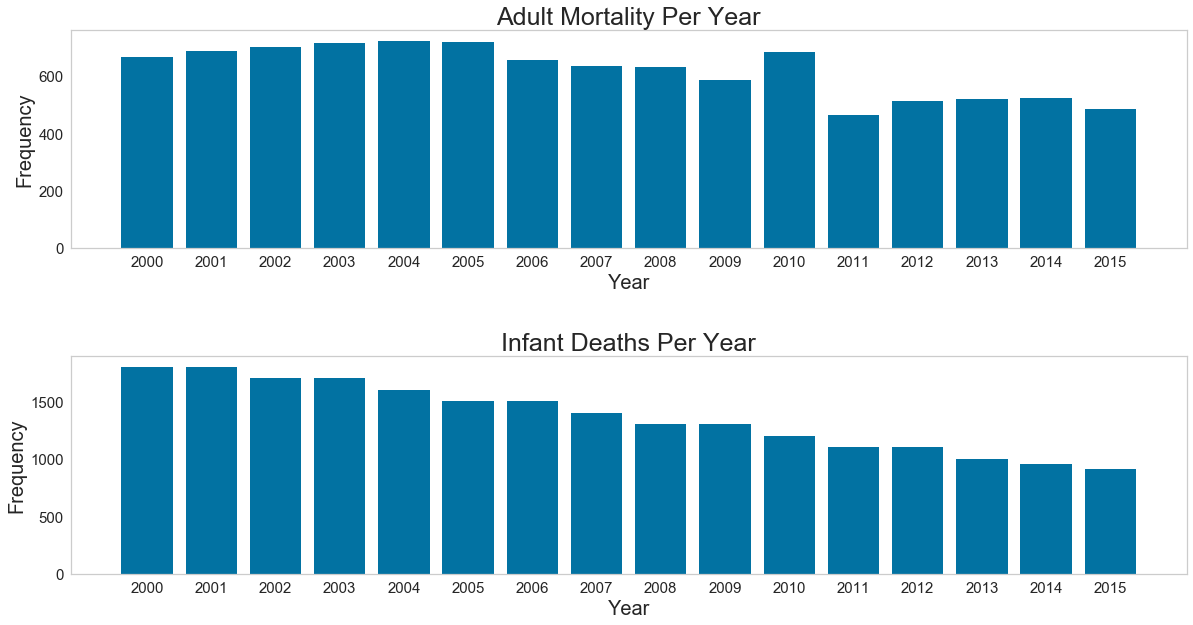

In [11]:
data = data.sort_values('Year')

fig, axes = plt.subplots(nrows = 2, ncols = 1)

axes[0].bar(data['Year'], data['Adult Mortality'])
axes[0].set_title('Adult Mortality Per Year', fontsize=25)
axes[0].set_ylabel('Frequency', fontsize=20)
axes[0].set_xlabel('Year', fontsize=20)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].grid(False)

axes[1].bar(data['Year'], data['Infant Deaths'])
axes[1].set_title('Infant Deaths Per Year', fontsize=25)
axes[1].set_ylabel('Frequency', fontsize=20)
axes[1].set_xlabel('Year', fontsize=20)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].grid(False)

fig.subplots_adjust(hspace=.5)

plt.show()

The comparisons above show that consistently far more infants die per year than adults. While they're not on the same graph, it can be observed based on the different y-axis scale. 

__Step 6.__  Using the basic understanding of the attributes through preliminary analysis, scatterplots will be plotted. Specifically to understand the relationship between Life Expectancy and the different diseases one could contract. 

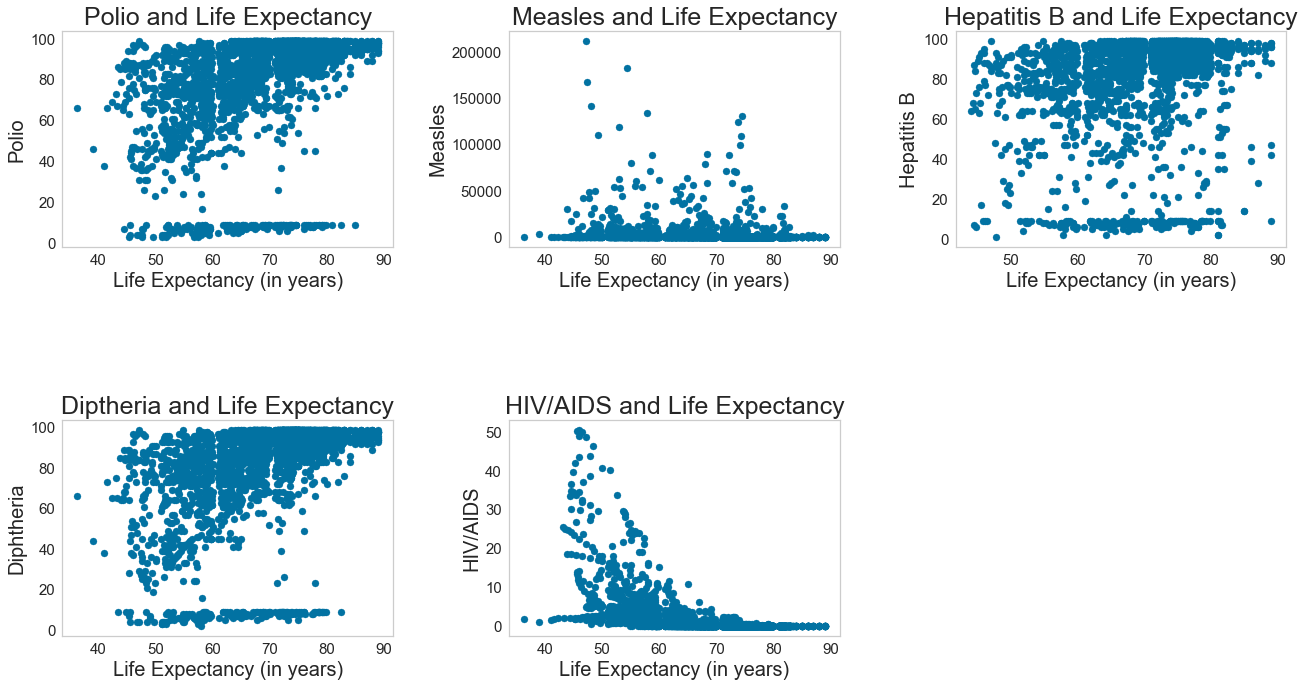

In [12]:
fig, axes = plt.subplots(nrows = 2, ncols = 3)

# This specifies what data to include in the box plot where values of 1 are catgorized as 'yes' and those of 0 are 'no'
# make the data read to feed into the visulizer
axes[0, 0].scatter(data['Life Expectancy'], data['Polio'])
axes[0, 0].set_title('Polio and Life Expectancy', fontsize=25)
axes[0, 0].set_ylabel('Polio', fontsize=20)
axes[0, 0].set_xlabel('Life Expectancy (in years)', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].grid(False)

axes[0, 1].scatter(data['Life Expectancy'], data['Measles'])
axes[0, 1].set_title('Measles and Life Expectancy', fontsize=25)
axes[0, 1].set_ylabel('Measles', fontsize=20)
axes[0, 1].set_xlabel('Life Expectancy (in years)', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].grid(False)

axes[0, 2].scatter(data['Life Expectancy'], data['Hepatitis B'])
axes[0, 2].set_title('Hepatitis B and Life Expectancy', fontsize=25)
axes[0, 2].set_ylabel('Hepatitis B', fontsize=20)
axes[0, 2].set_xlabel('Life Expectancy (in years)', fontsize=20)
axes[0, 2].tick_params(axis='both', labelsize=15)
axes[0, 2].grid(False)

axes[1, 0].scatter(data['Life Expectancy'], data['Diphtheria'])
axes[1, 0].set_title('Diptheria and Life Expectancy', fontsize=25)
axes[1, 0].set_ylabel('Diphtheria', fontsize=20)
axes[1, 0].set_xlabel('Life Expectancy (in years)', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].grid(False)

axes[1, 1].scatter(data['Life Expectancy'], data['HIV/AIDS'])
axes[1, 1].set_title('HIV/AIDS and Life Expectancy', fontsize=25)
axes[1, 1].set_ylabel('HIV/AIDS', fontsize=20)
axes[1, 1].set_xlabel('Life Expectancy (in years)', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].grid(False)


axes[1,2].grid(False)
axes[1,2].axis('off')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.8,
                    wspace=0.35)
plt.show()

__Step 7.__ Now, bar graphs will be created to understand the difference between developing and developed countries. 

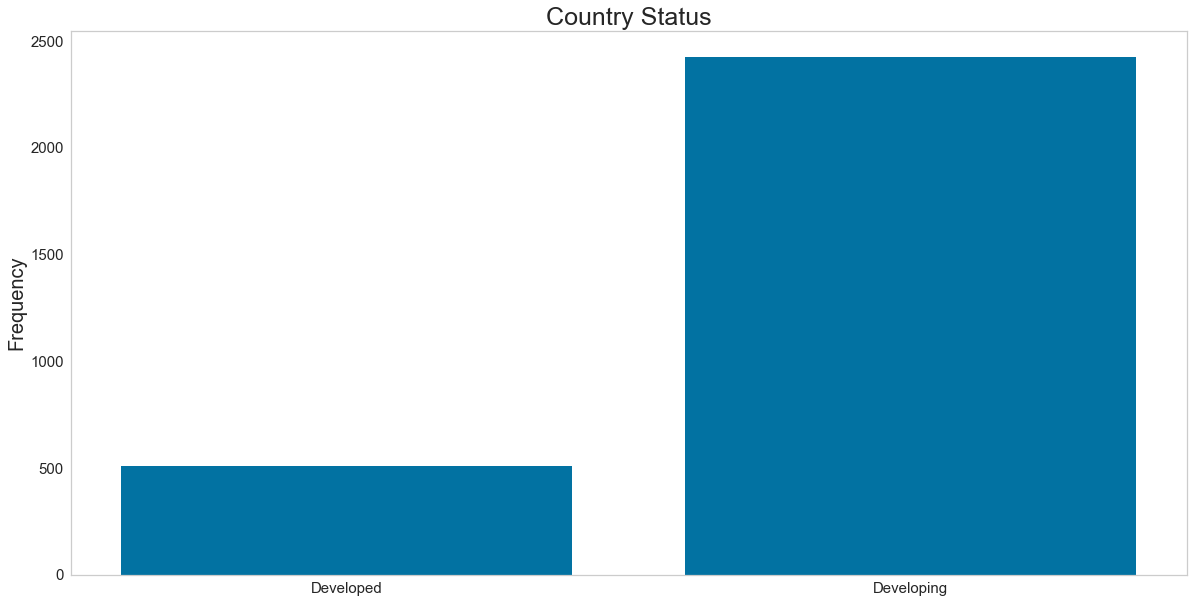

In [13]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, axes = plt.subplots(nrows = 1, ncols = 1)

lb_make = LabelEncoder()
data['Status'] = lb_make.fit_transform(data['Status'])

# This specifies what data to include in the box plot where values of 1 are catgorized as 'yes' and those of 0 are 'no'
# make the data read to feed into the visulizer
X_Developed = data.replace({'Status': {1: 'Developing', 0: 'Developed'}}).groupby('Status').size().reset_index(name='Frequency')['Status']
Y_Developed = data.replace({'Status': {1: 'Developing', 0: 'Developed'}}).groupby('Status').size().reset_index(name='Frequency')['Frequency']
# make the bar plot
axes.bar(X_Developed, Y_Developed)
axes.set_title('Country Status', fontsize=25)
axes.set_ylabel('Frequency', fontsize=20)
axes.tick_params(axis='both', labelsize=15)
axes.grid(False)

plt.show()

__Step 8.__ Now, correlations bewteen the different diseases will be explored.

/Users/jckett/anaconda3/lib/python3.7/site-packages/yellowbrick/features/rankd.py:215: YellowbrickWarning: RankD plots may be clipped when using matplotlib v3.1.1, upgrade to matplotlib v3.1.2 or later to fix the plots.
  warnings.warn(msg, YellowbrickWarning)


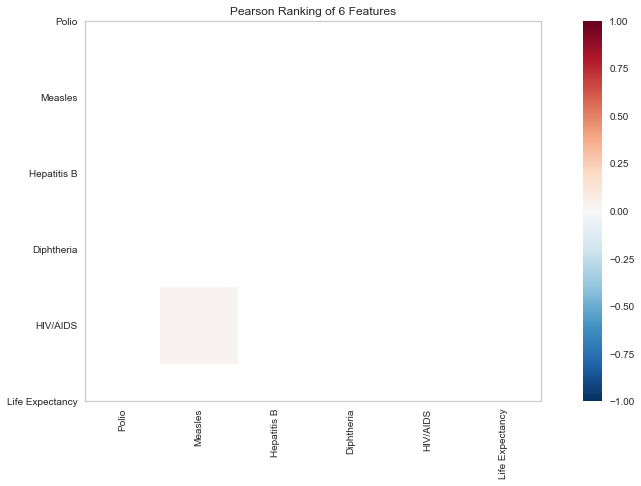

In [4]:
plt.rcParams['figure.figsize'] = (15, 7)

num_features = ['Polio', 'Measles', 'Hepatitis B', 'Diphtheria', 'HIV/AIDS', 'Life Expectancy']
X = data[num_features].values

# Rank2D from the yellowbrick package is used to create a correlation map
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                
visualizer.transform(X)     
visualizer.poof()
#visualizer.poof(outpath = 'correlation.png') This saves the graph as a PNG file in the same directory as the notebook file

The above plot indicates very little correaltion between the attributes. If anything, Measles and HIV/AIDS is ever so slightly negatively correlated. 

__Step 9.__ Another way to explore correlation is through Parallel Coordinates. 

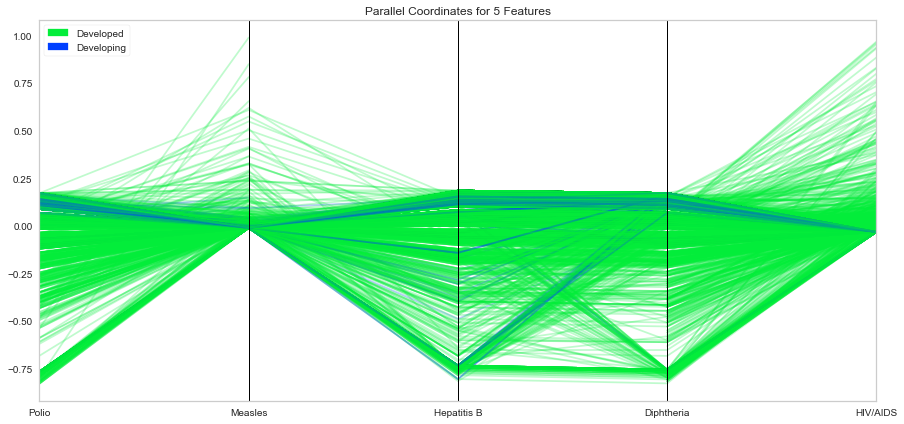

In [15]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# This sets the color pallete for the visualization
set_palette('sns_bright')

# This specifies what data and labels to use for the graph
classes = ['Developing', 'Developed']
num_features = ['Polio', 'Measles', 'Hepatitis B', 'Diphtheria', 'HIV/AIDS']

# Parallel Coordinate graphs require the data to be normalized
# To maintain the original dataframe to allow for future analysis, a copy of the dataframe will be created and used
data_norm = data.copy()
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].values
y = data.Status.values

visualizer = ParallelCoordinates(classes=classes, features=num_features)
visualizer.fit(X, y)      
visualizer.transform(X)
visualizer.poof()

The graph matches the results from the correlation graph in that there is no real trend between diseases and one another. 

__Step 10.__ To further analyze the differences between developed and developing countries, stacked bar graphs will be created for each disease.

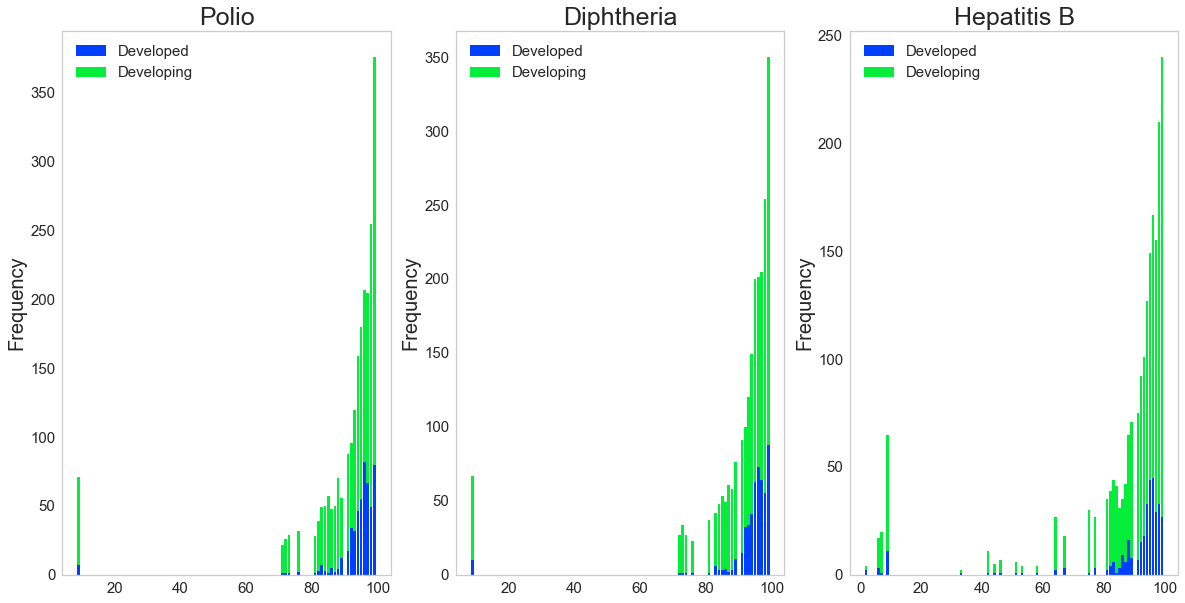

In [16]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, axes = plt.subplots(nrows = 1, ncols = 3)

developed_polio = data.replace({'Status': {1: 'Developing', 0: 'Developed'}})[data['Status']==0]['Polio'].value_counts()
developing_polio = data.replace({'Status': {1: 'Developing', 0: 'Developed'}})[data['Status']==1]['Polio'].value_counts()
developing_polio = developing_polio.reindex(index = developed_polio.index)

# By having p1 and p2, they can both be plotted onto the same plot, hence stacked bar chart
# The bottom parameter of the bar() plot indicates which attribute/index to graph first
p1 = axes[0].bar(developed_polio.index, developed_polio.values)
p2 = axes[0].bar(developing_polio.index, developing_polio.values, bottom=developed_polio.values)
axes[0].set_title('Polio', fontsize=25)
axes[0].set_ylabel('Frequency', fontsize=20)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].legend((p1[0], p2[0]), ('Developed', 'Developing'), fontsize = 15)
axes[0].grid(False)

# make the data read to feed into the visualizer
developed_dip = data.replace({'Status': {1: 'Developing', 0: 'Developed'}})[data['Status']==0]['Diphtheria'].value_counts()
developing_dip = data.replace({'Status': {1: 'Developing', 0: 'Developed'}})[data['Status']==1]['Diphtheria'].value_counts()
developing_dip = developing_dip.reindex(index = developed_dip.index)

# make the bar plot
p5 = axes[1].bar(developed_dip.index, developed_dip.values)
p6 = axes[1].bar(developing_dip.index, developing_dip.values, bottom=developed_dip.values)
axes[1].set_title('Diphtheria', fontsize=25)
axes[1].set_ylabel('Frequency', fontsize=20)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].legend((p5[0], p6[0]), ('Developed', 'Developing'), fontsize = 15)
axes[1].grid(False)

# make the data read to feed into the visualizer
developed_hep = data.replace({'Status': {1: 'Developing', 0: 'Developed'}})[data['Status']==0]['Hepatitis B'].value_counts()
developing_hep = data.replace({'Status': {1: 'Developing', 0: 'Developed'}})[data['Status']==1]['Hepatitis B'].value_counts()
developing_hep = developing_hep.reindex(index = developed_hep.index)

# make the bar plot
p7 = axes[2].bar(developed_hep.index, developed_hep.values)
p8 = axes[2].bar(developing_hep.index, developing_hep.values, bottom=developed_hep.values)
axes[2].set_title('Hepatitis B', fontsize=25)
axes[2].set_ylabel('Frequency', fontsize=20)
axes[2].tick_params(axis='both', labelsize=15)
axes[2].legend((p7[0], p8[0]), ('Developed', 'Developing'), fontsize = 15)
axes[2].grid(False)

fig.subplots_adjust(hspace=.5)
plt.show()

Three of the five diseases were graphed since the other two were having issues. Further investigation will ensue as to why they were graphing incorrectly. Of the graphs that were created, it is evident that deaths are more likely to occur in developing countries than developed ones. 

There are many other graphs that can be created, and once the narrative of the project is more developed, it will become more clear what type of graphs and with what data should be created. 

__Step 11 and 12.__ Filling in missing data, eliminating features, and checking skew

Moving forward, since isnull().sum() indicated many attributes were missing data, two different techniques will be used to fill them in. 

Since most of the data is numerical, the averages of the attributes will be calculated and used to fill in the missing data. 

In [17]:
data.describe()

,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income Composition of Resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,0.825732,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,0.379405,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,1.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,1.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,1.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [18]:
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

# this executes the function on the Age attribute
fill_na_median(data['Life Expectancy'])
fill_na_median(data['Adult Mortality'])
fill_na_median(data['Alcohol'])
fill_na_median(data['Hepatitis B'])
fill_na_median(data['BMI'])
fill_na_median(data['Polio'])
fill_na_median(data['Diphtheria'])

# check the result
data.describe()

,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income Composition of Resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2712.00000,2938.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,0.825732,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,82.617767,5.93819,82.393125,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,0.379405,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,23.367166,2.49832,23.655562,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,1.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,1.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,1.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Comparing the second describe() table to the first one produced in 4 and 5, it is clear that the number of entries for the selected attributes increased by the number of null entries that were previously identified. Additionally, the additional entries affected the summary statistics a little.  

None of the categorical data had missing entries. If there were though, the most prevelant attribute entry would be used to fill in the missing entries. 

The distributions from 4 and 5 show Adult Mortality, Infant Deaths, and Under-Five Deaths all have skewed-distributions. To account for this, and get a better sense of the data, the logs of each will be calculated. More over, since all three of them are right-skewed, and likely include very small data, np.log1p() will be used instead of np.log()

First, the original distributions of these variables are as follows:

In [19]:
print(data['Adult Mortality'].describe())
print('\n')
print(data['Infant Deaths'].describe())
print('\n')
print(data['Under-Five Deaths'].describe())

count    2938.000000
mean      164.725664
std       124.086215
min         1.000000
25%        74.000000
50%       144.000000
75%       227.000000
max       723.000000
Name: Adult Mortality, dtype: float64


count    2938.000000
mean       30.303948
std       117.926501
min         0.000000
25%         0.000000
50%         3.000000
75%        22.000000
max      1800.000000
Name: Infant Deaths, dtype: float64


count    2938.000000
mean       42.035739
std       160.445548
min         0.000000
25%         0.000000
50%         4.000000
75%        28.000000
max      2500.000000
Name: Under-Five Deaths, dtype: float64


And the new distribution of each attribute is as follows:

In [20]:
def log_transformation(data):
    return data.apply(np.log1p)

data['Adult Mortality_log1p'] = log_transformation(data['Adult Mortality'])
data['Infant Deaths_log1p'] = log_transformation(data['Infant Deaths'])
data['Under-Five Deaths_log1p'] = log_transformation(data['Under-Five Deaths'])


# check the data
print(data['Adult Mortality_log1p'].describe()) 
print('\n')
print(data['Infant Deaths_log1p'].describe()) 
print('\n')
print(data['Under-Five Deaths_log1p'].describe()) 

count    2938.000000
mean        4.729214
std         1.035045
min         0.693147
25%         4.317488
50%         4.976734
75%         5.429346
max         6.584791
Name: Adult Mortality_log1p, dtype: float64


count    2938.000000
mean        1.768585
std         1.663020
min         0.000000
25%         0.000000
50%         1.386294
75%         3.135494
max         7.496097
Name: Infant Deaths_log1p, dtype: float64


count    2938.000000
mean        1.940084
std         1.781790
min         0.000000
25%         0.000000
50%         1.609438
75%         3.367296
max         7.824446
Name: Under-Five Deaths_log1p, dtype: float64


To see this change graphically, new histograms of each attribute are plotted. 

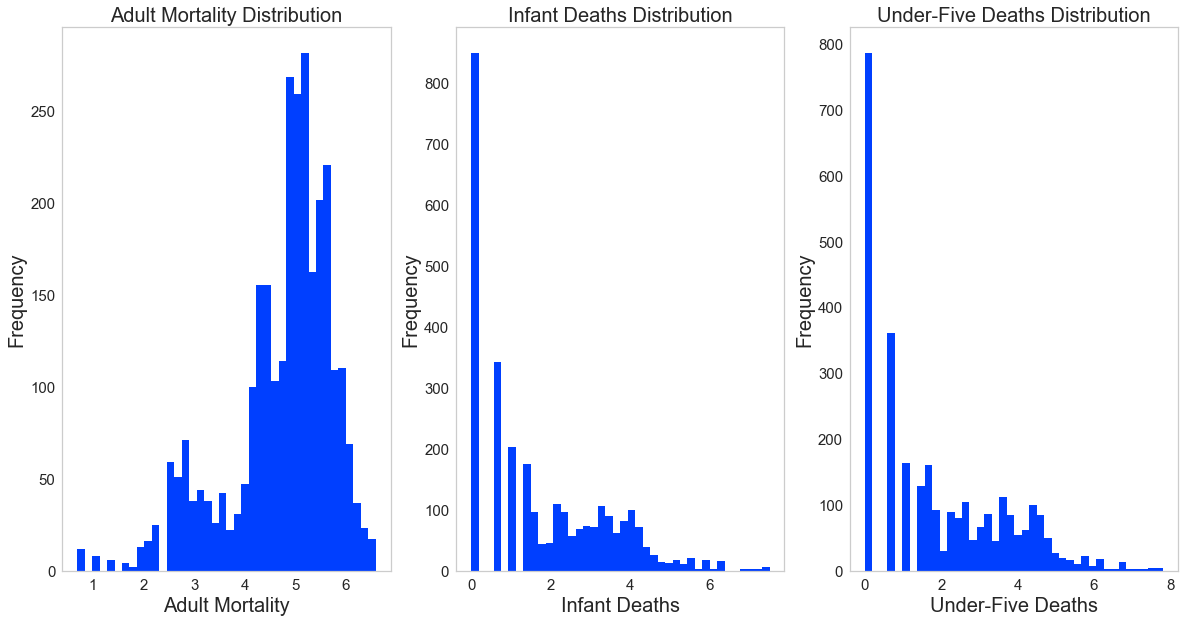

In [21]:
# This determines the plot sizes 
plt.rcParams['figure.figsize'] = (20, 10)

# This specifies how supplot layout
fig, axes = plt.subplots(nrows = 1, ncols = 3)

# This specifies which variables to include across all our subplots 
num_features = ['Adult Mortality_log1p', 'Infant Deaths_log1p', 'Under-Five Deaths_log1p']
plot_data = num_features
xlab = ['Adult Mortality', 'Infant Deaths', 'Under-Five Deaths']
ylab = ['Frequency', 'Frequency', 'Frequency', 'Frequency']
titles = ['Adult Mortality Distribution', 'Infant Deaths Distribution', 'Under-Five Deaths Distribution']

# This creates an array for the axes, and allows for plot label specification
axes = axes.ravel()

# This for loop, it takes two parameters and cycles through them. For instance, the first plot will draw information
# from the first entry of the num_features, xlab, ylab, and titles lists created above. The second plot with draw
# from the second entry of the same lists and so on. 
for idx, ax in enumerate(axes):
    ax.hist(data[plot_data[idx]].dropna(), bins=40)
    ax.set_xlabel(xlab[idx], fontsize=20)
    ax.set_ylabel(ylab[idx], fontsize=20)
    ax.set_title(titles[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    ax.grid(False) #this removes the grid lines on the plots

plt.show()


While the data is still skewed, it can be argued that Adult Mortality does seem more normally distributed. As for Infant Deaths and Under-Five Deaths, the y-axis is significanly smaller, and better insight into the distribution is provided. 

__Step 13.__ One Hot Encoding

To be able to include categorical data in future analysis, they should be encoded. 

In [22]:
# this identifies the categorical attributes within the dataset 
cat_features = ['Country', 'Year', "Status"]
data_cat = data[cat_features]

# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)

# check the data
# if the following were uncommented, it would show all the columns of the array
# # however, this took a lot of space in the PDF version, so it was removed
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(data_cat_dummies.head(5))

print(data_cat_dummies.head(5))

      Status  Country_Afghanistan  Country_Albania  Country_Algeria  \
2937       1                    0                0                0   
271        1                    0                0                0   
1361       1                    0                0                0   
849        1                    0                0                0   
2424       1                    0                0                0   

      Country_Angola  Country_Antigua and Barbuda  Country_Argentina  \
2937               0                            0                  0   
271                0                            0                  0   
1361               0                            0                  0   
849                0                            0                  0   
2424               0                            0                  0   

      Country_Armenia  Country_Australia  Country_Austria  ...  Year_2006  \
2937                0                  0                0  ... 

The above matrix shows how the entries were encoded. For instance, where a 1 is present indicates that is the value for that entry and attribute. First instance the first line above has the value 1 for Country_Zimbabwe, meaning the first entry is for that country. The only exception to this is the Status attribute where 1 signifies Developing and 0 signifies Developed. 

__Step 14.__ Model Selection

The goal of this model will be to predict the life expectancy based on attributes. The attributes will be chosen based on the results of a correlation heat map. 

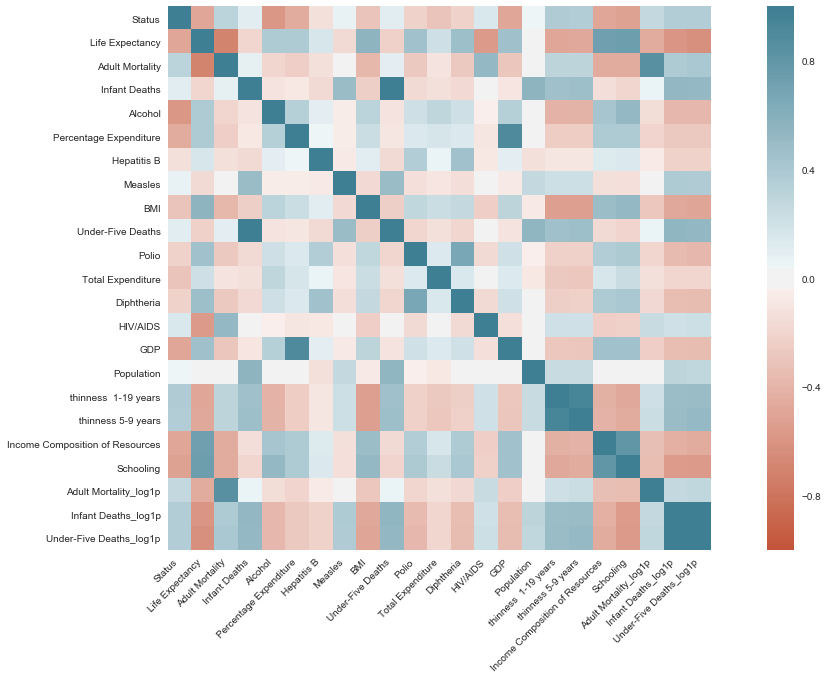

In [23]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Looking at the correlation heat map above, the attributes that are most heavily correlated with Life Expectancy are the following:
- Status
- Adult Mortality
- BMI
- HIV/AIDS
- Income Composition of Resources
- Schooling
- log of Infant Deaths
- log of Under Five Deaths

Since the inputs and outputs of the model being created are numerical, a linear regression model will be created. 

In [24]:
data['Schooling'].isnull().sum(), data['Income Composition of Resources'].isnull().sum()

(163, 167)

In [25]:
linear_set = data.filter(['Status', 'Adult Mortality', 'BMI', 'HIV/AIDS', 'Income Composition of Resources', 'Schooling', 'Infant Deaths_log1p', 'Under-Five Deaths_log1p'], axis = 1)
fill_na_median(linear_set['Schooling'])
fill_na_median(linear_set['Income Composition of Resources'])

In [28]:
data_model_X = linear_set
data_model_y = data['Life Expectancy'] 

X_train, X_test, y_train, y_test = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in testing set:", X_test.shape[0])

No. of samples in training set:  2056
No. of samples in testing set: 882


__Step 15.__ Model Assessment

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions= model.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results.dropna(subset=['Actual'])

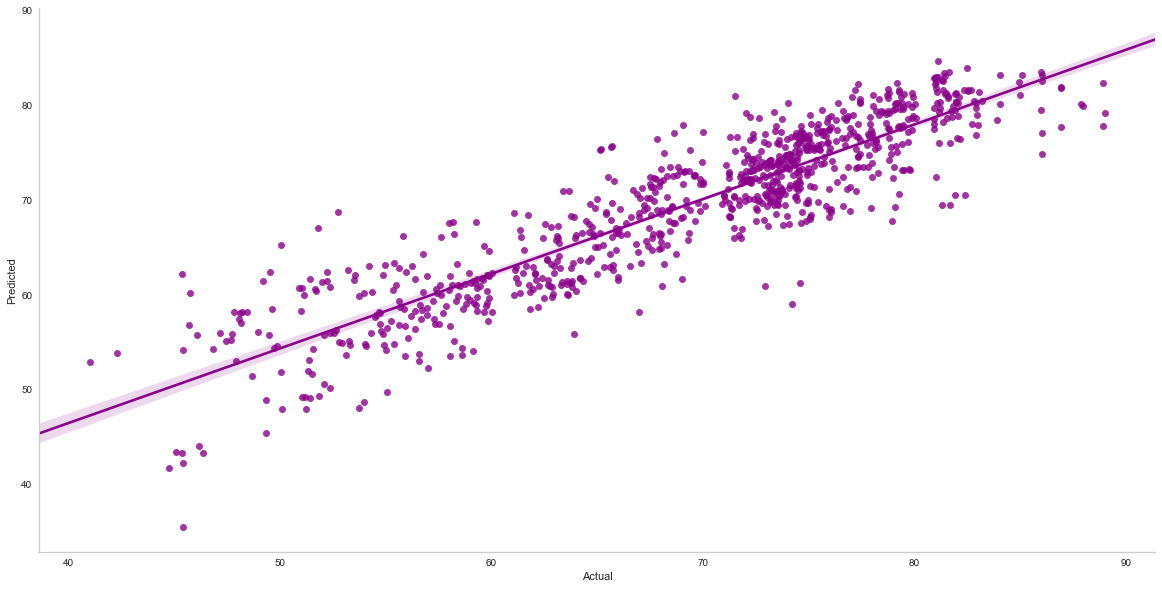

In [47]:
ax = sns.regplot(x="Actual", y="Predicted", color = 'darkmagenta', data=results, x_jitter=.1)
ax.grid(False)
sns.despine(left=False, bottom=False, right=True)

In [39]:
model.score(X_train, y_train)

0.8161402616805508

In [40]:
model.intercept_

63.907847361465656

In [41]:
model.coef_

array([-2.19543046, -0.01860873,  0.03603944, -0.43088848,  8.54793762,
        0.55427584,  7.5196262 , -8.09014103])